# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# The Data
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

# Variable:	                Description

Item_Identifier:	        Unique product ID

Item_Weight:	            Weight of product

Item_Fat_Content:	        Whether the product is low fat or not

Item_Visibility:	        The % of total display area of all products in a store allocated to the particular product

Item_Type:	                The category to which the product belongs

Item_MRP:	                Maximum Retail Price (list price) of the product

Outlet_Identifier:	        Unique store ID

Outlet_Establishment_Year:	The year in which store was established

Outlet_Size:	            The size of the store in terms of ground area covered

Outlet_Location_Type:	    The type of city in which the store is located

Outlet_Type:	            Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales:	        Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [2]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
train = pd.read_csv("C:\\BigMart_Sales\\Train (2).csv") 
test = pd.read_csv("C:\\BigMart_Sales\\Test (2).csv") 

In [6]:
# TO see first 5 row in data sets
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.shape

(8523, 12)

In [89]:
test.shape

(5681, 33)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# Checking for missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries


In [11]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
train['Outlet_Establishment_Year'].unique().max()

train['Outlet_Establishment_Year'].unique().min()

1985

Distribution of Target variable - Item Outlet Sales

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

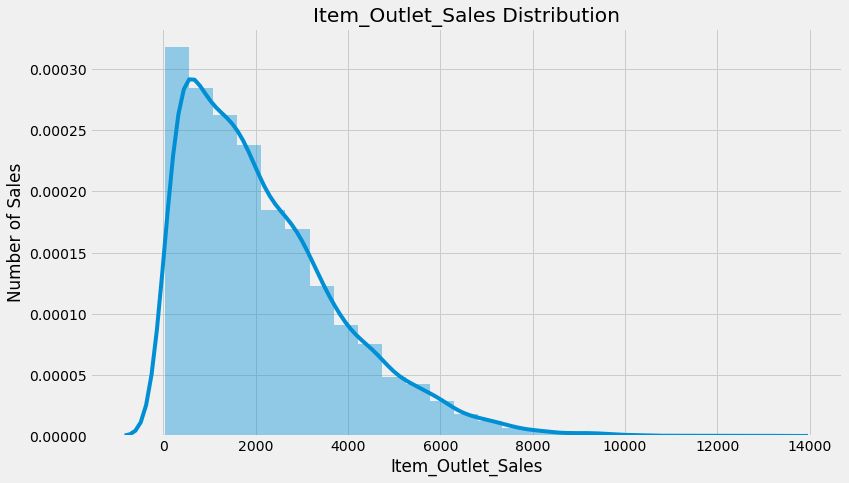

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [14]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


Numerical Variables

In [15]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [16]:
corr = numeric_features.corr()
print (corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


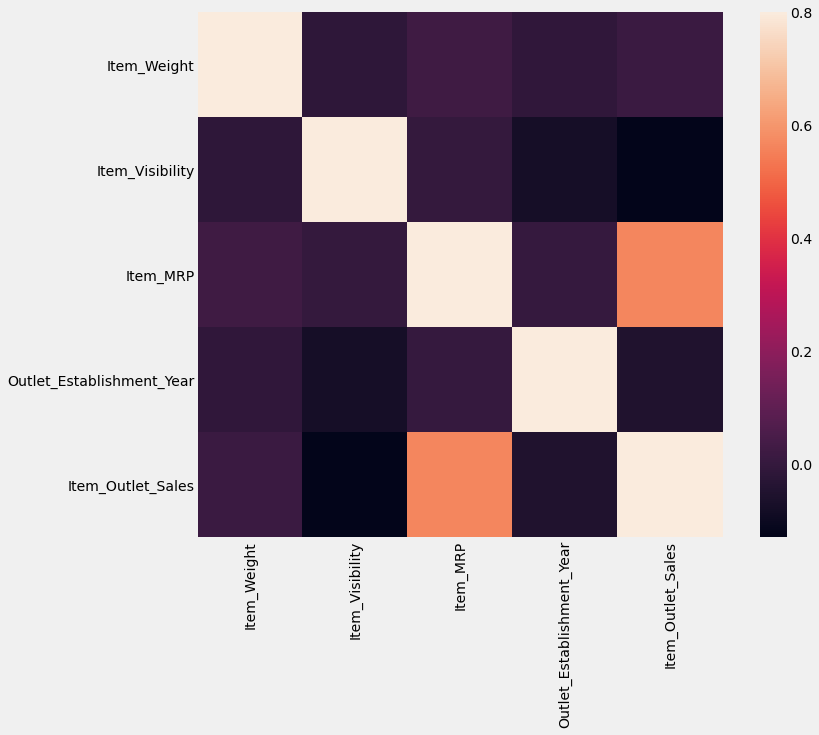

In [17]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

Categorical Variables

Distribution of Item Fat Content

In [18]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

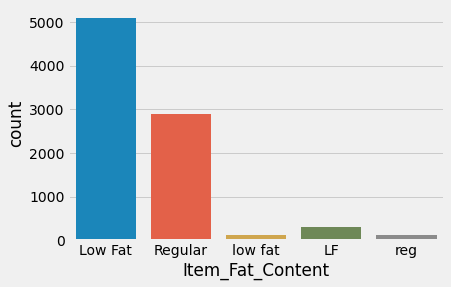

In [19]:
sns.countplot(train.Item_Fat_Content)

Distribution of Item Type

In [20]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

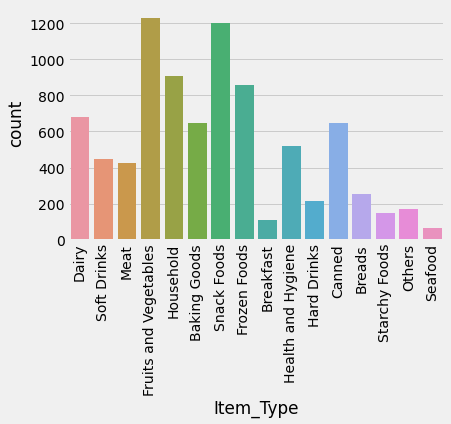

In [21]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

Distribution of Outlet Size

In [22]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

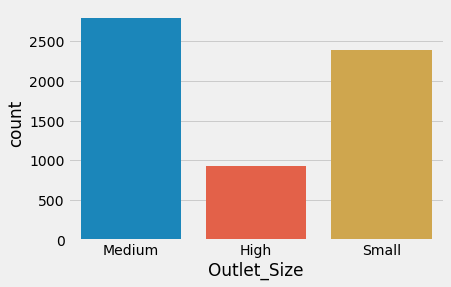

In [23]:
sns.countplot(train.Outlet_Size)

Distribution of the Outlet Location Type

In [24]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

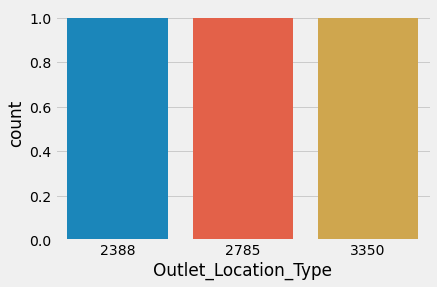

In [25]:
sns.countplot(train.Outlet_Location_Type.value_counts())

Distribution of Outlet Type

In [26]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

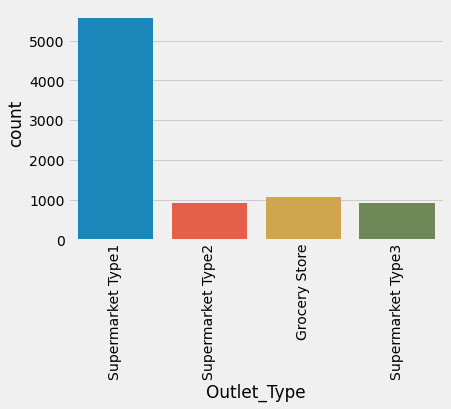

In [27]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

 Bivariate Distribution

Numerical Variable

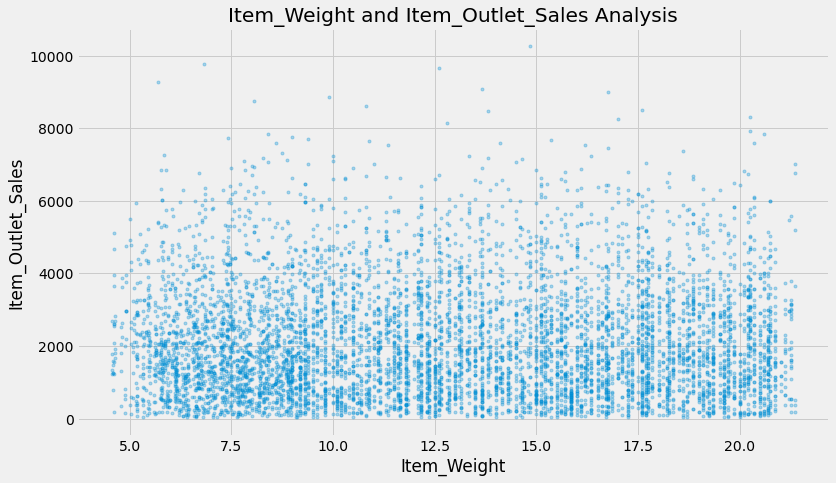

In [28]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

Item visibility and Item Outlet Sales

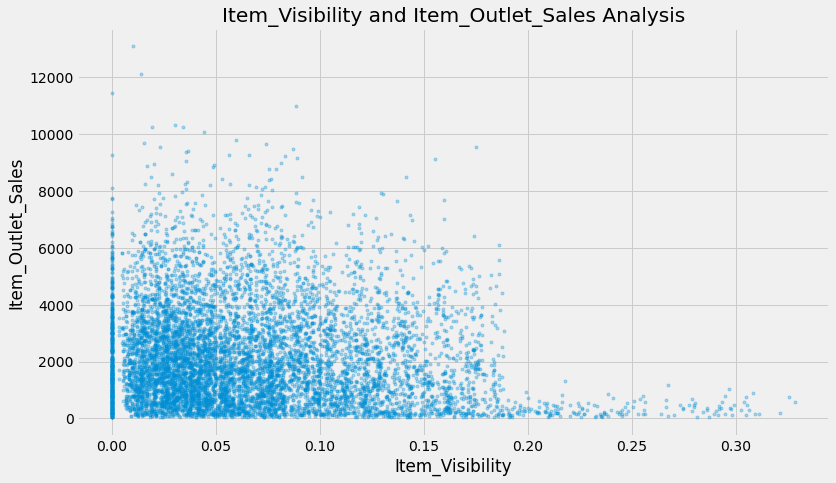

In [29]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

Item MRP and Item Outlet Sales

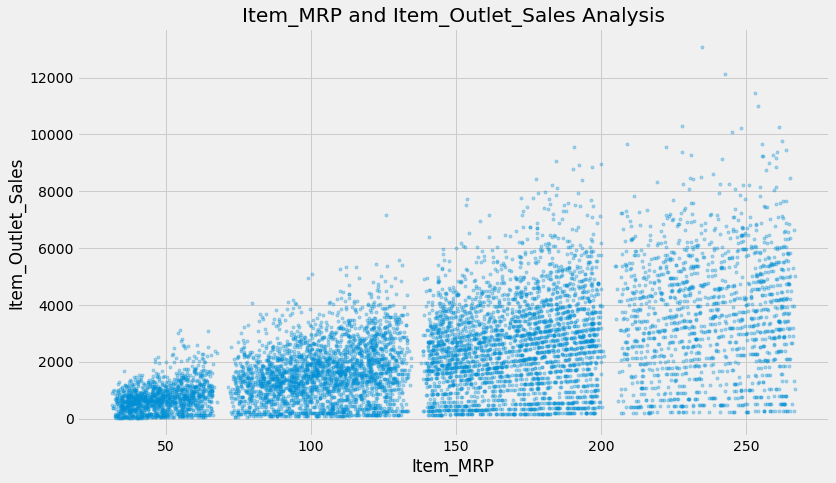

In [30]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")
plt.plot(train.Item_MRP, train["Item_Outlet_Sales"],'.', alpha = 0.3)

Outlet Establishment Year and Item Outlet Sales

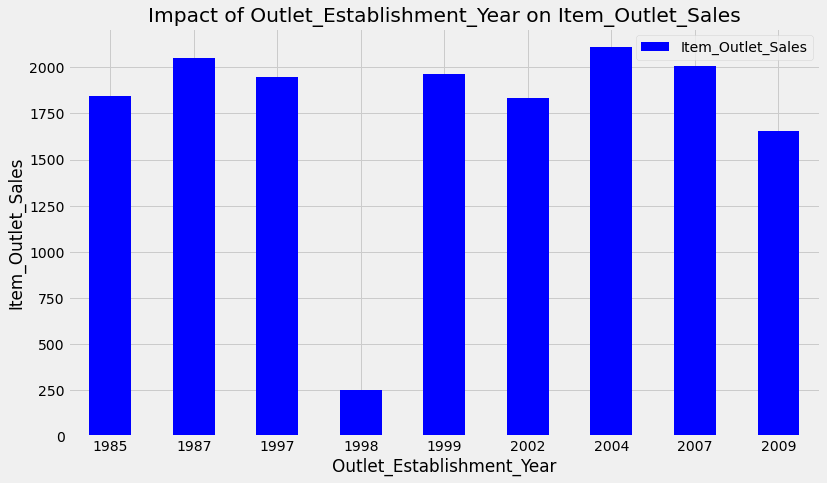

In [31]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Categorical Variables

In [32]:
numeric_features = train.select_dtypes(include=[np.object])
numeric_features.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

Impact of Item Identifier on Item Outlet Sales

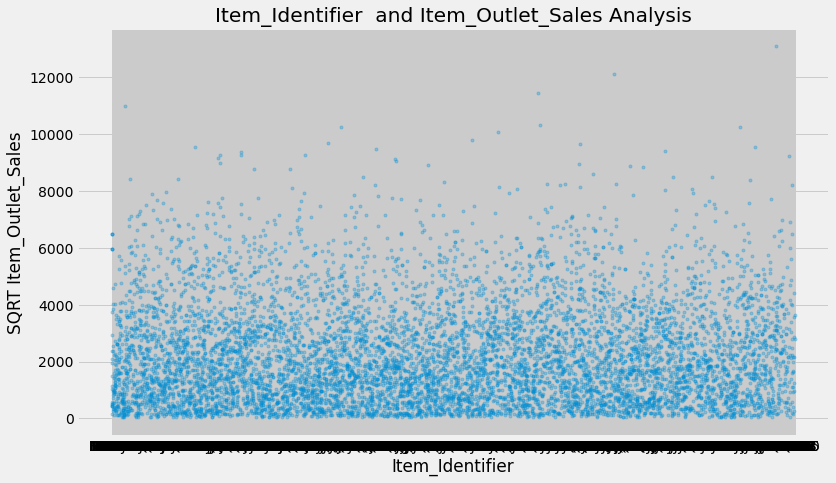

In [33]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Identifier")
plt.ylabel("SQRT Item_Outlet_Sales")
plt.title("Item_Identifier  and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Identifier , train["Item_Outlet_Sales"],'.', alpha = 0.3)

Impact of Item_Fat_Content on Item_Outlet_Sales

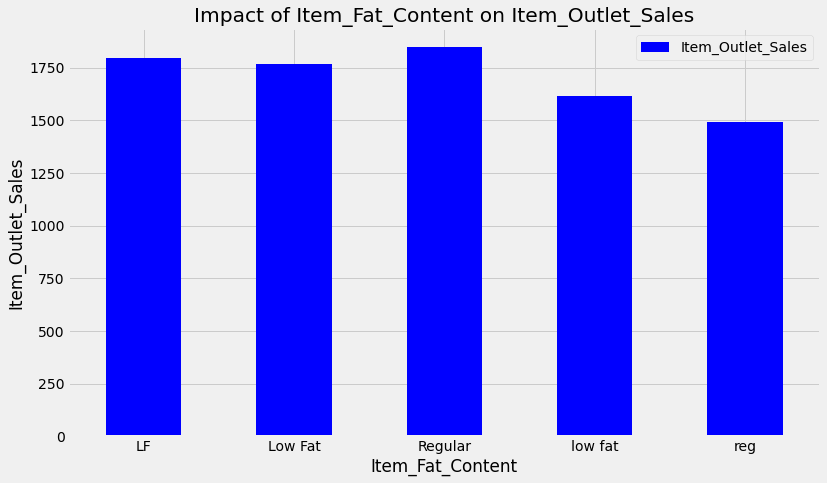

In [34]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


Impact of Outlet Identifier on Item Outlet Sales

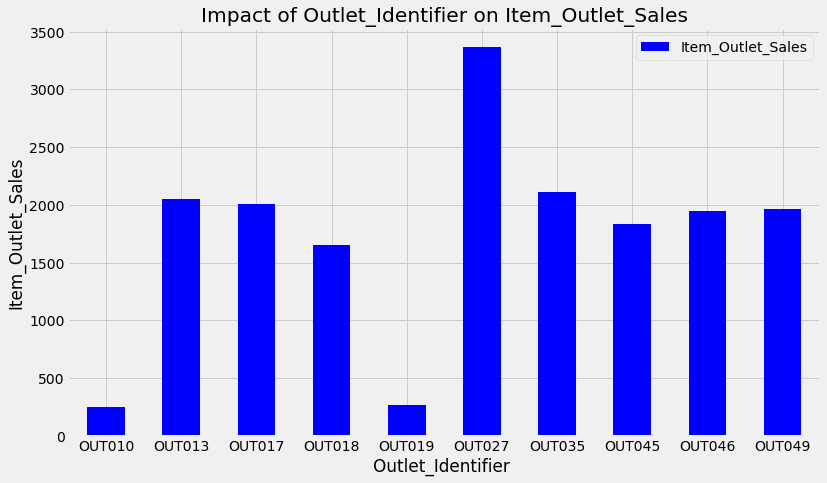

In [35]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [36]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [37]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


Impact of Outlet Size on Item Outlet Sales

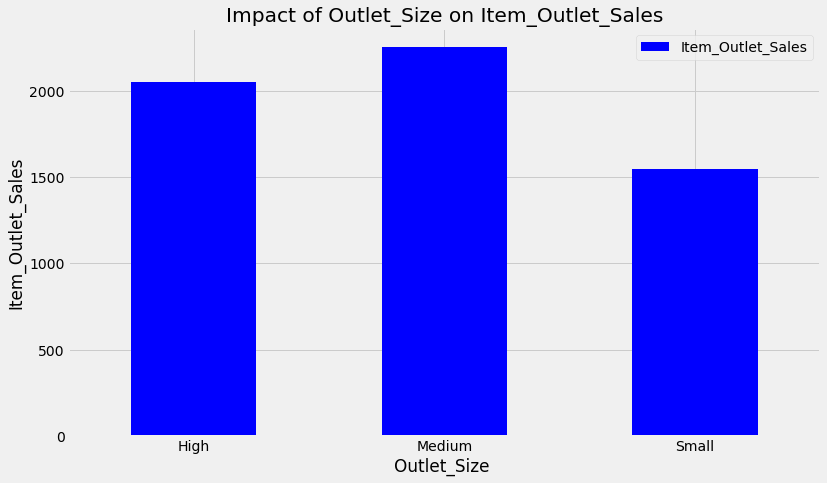

In [38]:
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Size ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Impact of Outlet Location type on Item Outlet Sales

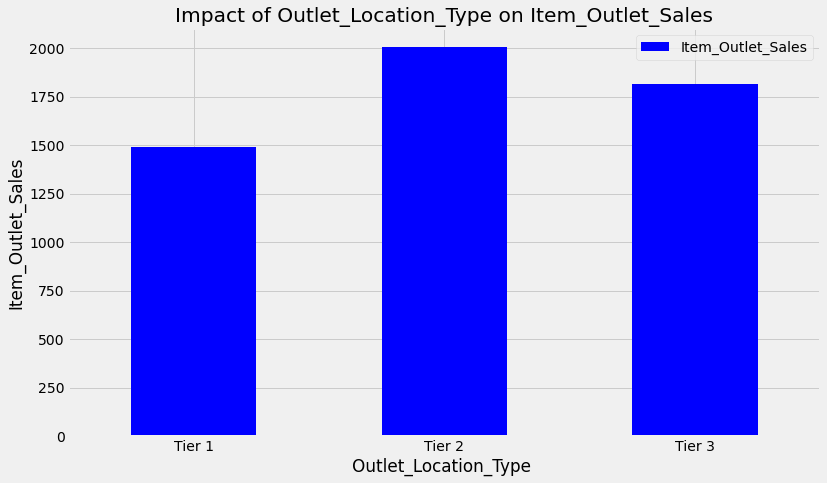

In [39]:
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [40]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


Impact of Outlet_Type on Item_Outlet_Sales

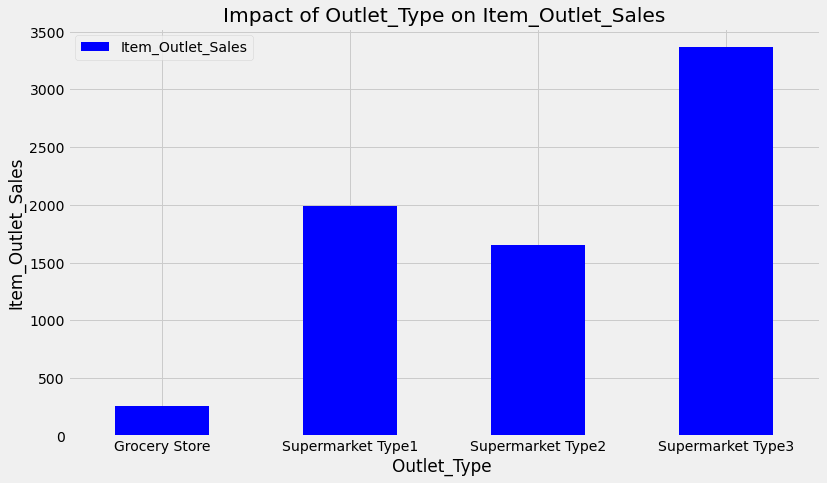

In [41]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Impact of Item Type on Item Outlet Sales

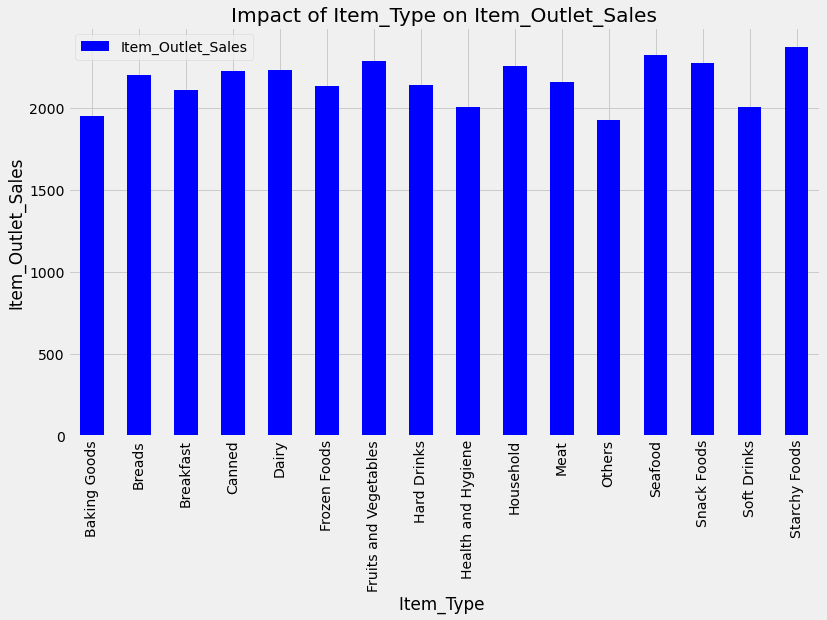

In [42]:
pivoTable = \
train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

Impact of Item Type vs Item Visibility

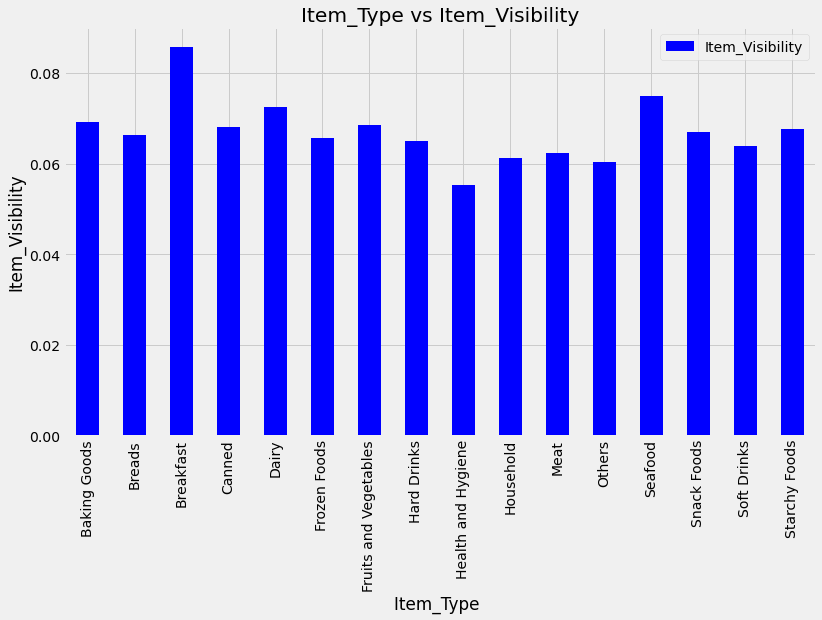

In [43]:
pivoTable = \
train.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Visibility")
plt.title("Item_Type vs Item_Visibility")
plt.xticks(rotation=90)
plt.show()

# Data Preprocessing

Missing Values

In [44]:
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True)
data.to_csv("data.csv",index=False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


Imputing missing values

In [45]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [46]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight


In [47]:
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


Impute Outlet size with mode

In [48]:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [49]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


# Feature Engineering

Combine Outlet Type

In [50]:
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


Item visibility minimum value 0

In [51]:
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [52]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 879
Final #zeros: 0


In [53]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

Create a broad category of Type of Item

In [54]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

Modify categories of Item Fat Content

In [55]:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Mark non-consumables as seperate category in low fat

In [56]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Feature Transformations

Creating variable Item_Visibility_MeanRatio

In [57]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

Numerical and Categorical Variables – Dummy variables

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [60]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

# Exporting Data

In [61]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

# Prediction

In [62]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

In [67]:

target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import metrics
from sklearn.model_selection import cross_validate


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validate(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score['test_score']))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.38 | Min - 1075 | Max - 1210


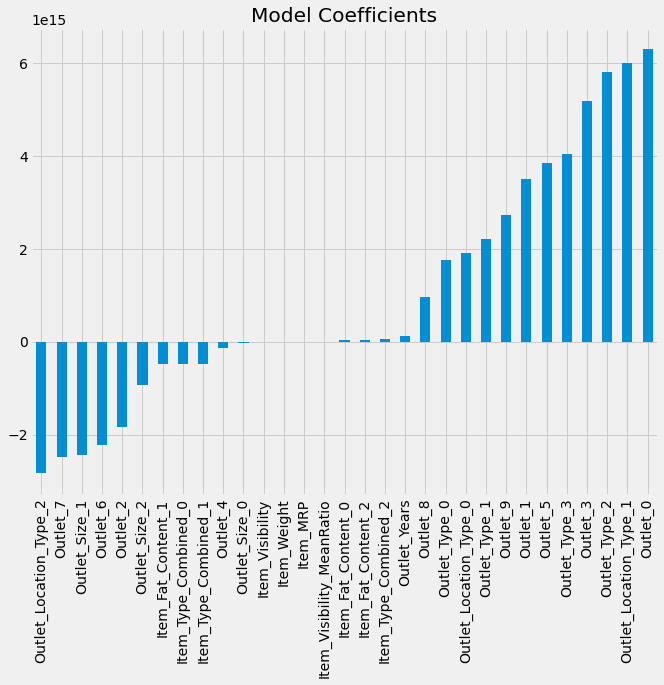

In [68]:
# Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients',figsize=(10,8))


Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217


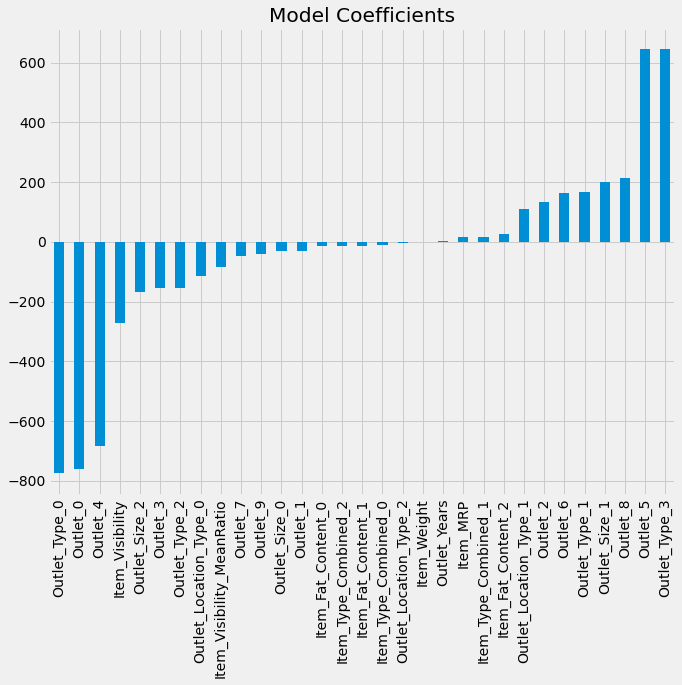

In [71]:
# Ridge Regression
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')

coef2 = pd.Series(RR.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients',figsize=(10,8))


Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186


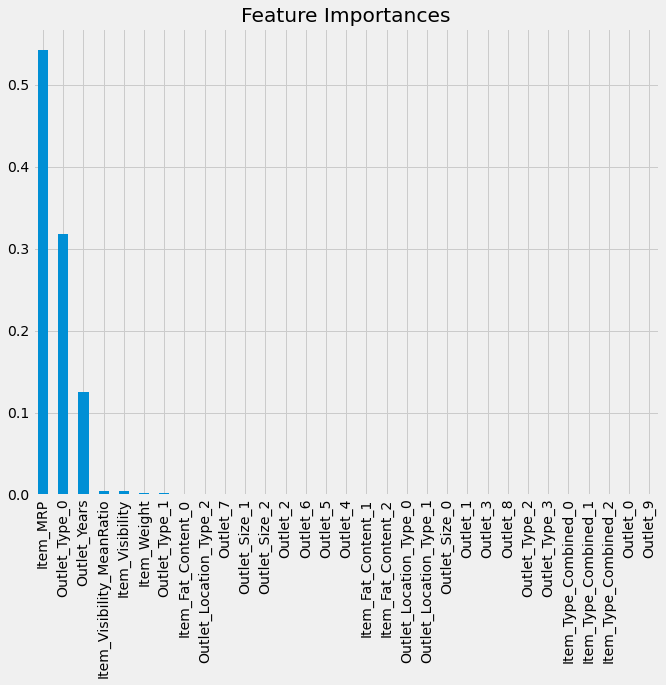

In [72]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')

coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances',figsize=(10,8))


Model Report
RMSE : 1069
CV Score : Mean - 1097 | Std - 43.41 | Min - 1028 | Max - 1180


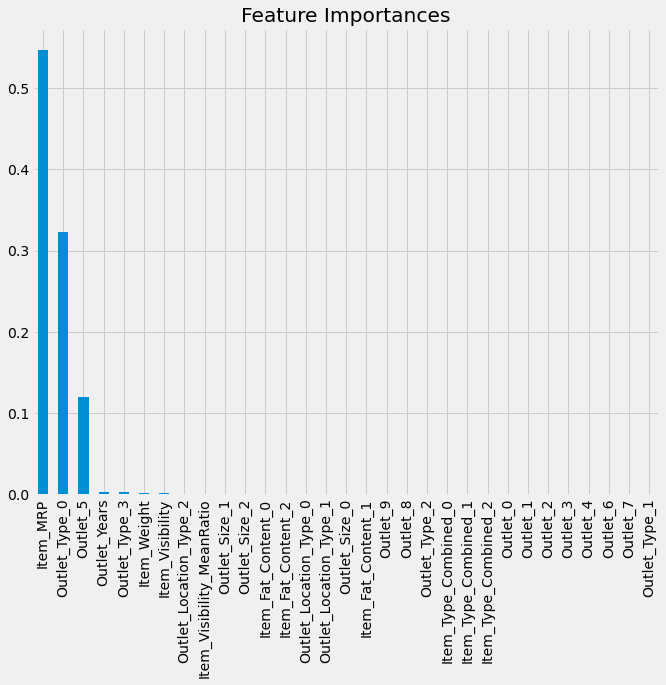

In [73]:
# Random Forest Regression
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances',figsize=(10,8))

In [ ]:
from xgboost import XGBRegressor

In [79]:
# XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=2500, learning_rate=.02, 
                   objective='reg:squarederror', n_jobs=10, colsample_bytree=.8, max_depth=8,
                   random_state=42, importance_type='total_gain', reg_alpha=.5)
xgb.fit(train_df[predictors], train_df[target], early_stopping_rounds=10, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='total_gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2500, n_jobs=10, num_parallel_tree=1, random_state=42,
             reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
#Predict training set:
train_df_predictions = xgb.predict(train_df[predictors])

# make predictions
predictions = xgb.predict(test_df[predictors])

In [81]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

Mean Absolute Error : 169.39910733022725
RMSE : 912.4


In [84]:
IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("XGboost.csv", index=False)

In [87]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1509.432313
1,FDW14,OUT017,1364.049154
2,NCN55,OUT010,542.975540
3,FDQ58,OUT017,2384.015126
4,FDY38,OUT027,5669.163351
